In [1]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import matplotlib.pyplot as plt

In [2]:
R = 10

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
arr1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [3]:
ncols

21

In [4]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

#arr1
print(np.array_str(arr1, precision=1))

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.7  3.2  3.9  4.2  4.4  4.2  3.9  3.2
   1.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   3.3  4.5  5.2  5.7  5.9  6.   5.9  5.7  5.2
   4.5  3.3  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.4  3.9  5.1  5.9  6.5  6.9  7.1  7.1  7.1  6.9  6.5
   5.9  5.1  3.9  1.4  0.   0.   0. ]
 [ 0.   0.   0.   3.9  5.3  6.2  6.9  7.4  7.7  7.9  8.   7.9  7.7  7.4
   6.9  6.2  5.3  3.9  0.   0.   0. ]
 [ 0.   0.   3.3  5.1  6.2  7.1  7.7  8.1  8.4  8.6  8.7  8.6  8.4  8.1
   7.7  7.1  6.2  5.1  3.3  0.   0. ]
 [ 0.   1.7  4.5  5.9  6.9  7.7  8.2  8.7  8.9  9.1  9.2  9.1  8.9  8.7
   8.2  7.7  6.9  5.9  4.5  1.7  0. ]
 [ 0.   3.2  5.2  6.5  7.4  8.1  8.7  9.1  9.3  9.5  9.5  9.5  9.3  9.1
   8.7  8.1  7.4  6.5  5.2  3.2  0. ]
 [ 0.   3.9  5.7  6.9  7.7  8.4  8.9  9.3  9.6  9.7  9.8  9.7  9.6  9.3
   8.9  8.4  7.7  6.9  5.7  3.9  0. ]
 [ 0.   4.2

In [5]:
print(np.max(arr1), np.min(arr1))

10.0 0.0


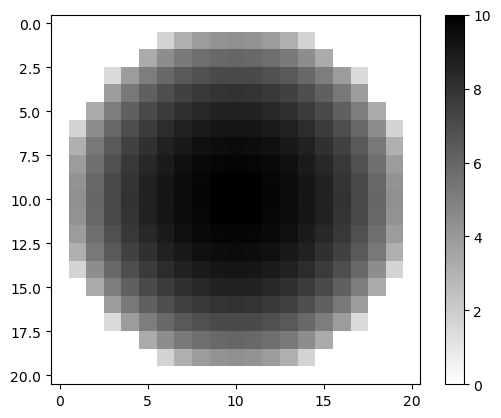

In [6]:
plt.imshow(arr1, cmap='binary')
plt.colorbar()
plt.show()

In [7]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_orig.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr1)
# gtiff.FlushCache()
gtiff = None

In [8]:
arr1[0][0]

arr2 = np.copy(arr1)

In [9]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n
arr_k

array([[ 5.51316275e-01, -1.74747749e+00,  1.70332988e+00,
         6.39515654e-01, -9.44610044e-01, -1.69001918e+00,
         1.99625698e-02, -6.33316207e-01,  1.85550245e+00,
         8.55099480e-01,  7.82499803e-01,  4.28694116e-01,
         1.50140584e-01, -2.22533757e-01, -1.16801409e-01,
        -1.26799893e+00,  1.13976138e+00,  5.26468553e-01,
         3.21833779e-01,  2.86655037e-01,  3.57179066e-01],
       [-7.71906812e-01,  1.47268319e+00,  9.25789353e-01,
         6.03558136e-01,  1.94893255e+00, -6.20312564e-01,
         3.91500898e+00,  2.94052578e+00,  3.51795064e+00,
         5.36385646e+00,  4.04672184e+00,  3.53656726e+00,
         3.96531270e+00,  3.95536969e+00,  2.20668546e+00,
         7.97936832e-01, -1.80465385e+00,  4.06505496e-01,
         7.94237268e-01, -1.17322166e+00,  1.31116113e+00],
       [-1.09536346e+00, -2.90243141e-02,  2.97282641e-02,
        -4.55975343e-01, -2.91061716e-01,  2.32348069e+00,
         5.17838068e+00,  5.34634833e+00,  5.26852496e

In [12]:
#fig, ax = plt.subplots(1, 3)
#ax[0].contour(arr1)
#ax[1].contour(arr_n)
#ax[2].contour(arr_k)
#plt.show()

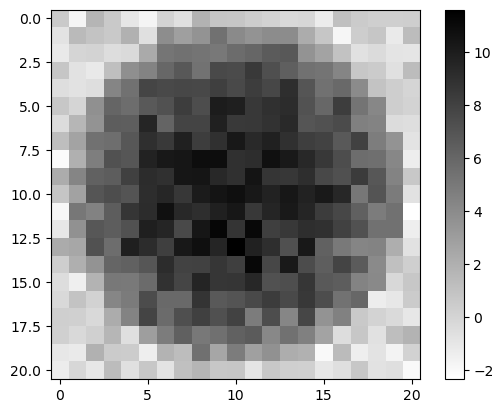

In [10]:
plt.imshow(arr_k, cmap='binary')
plt.colorbar()
plt.show()

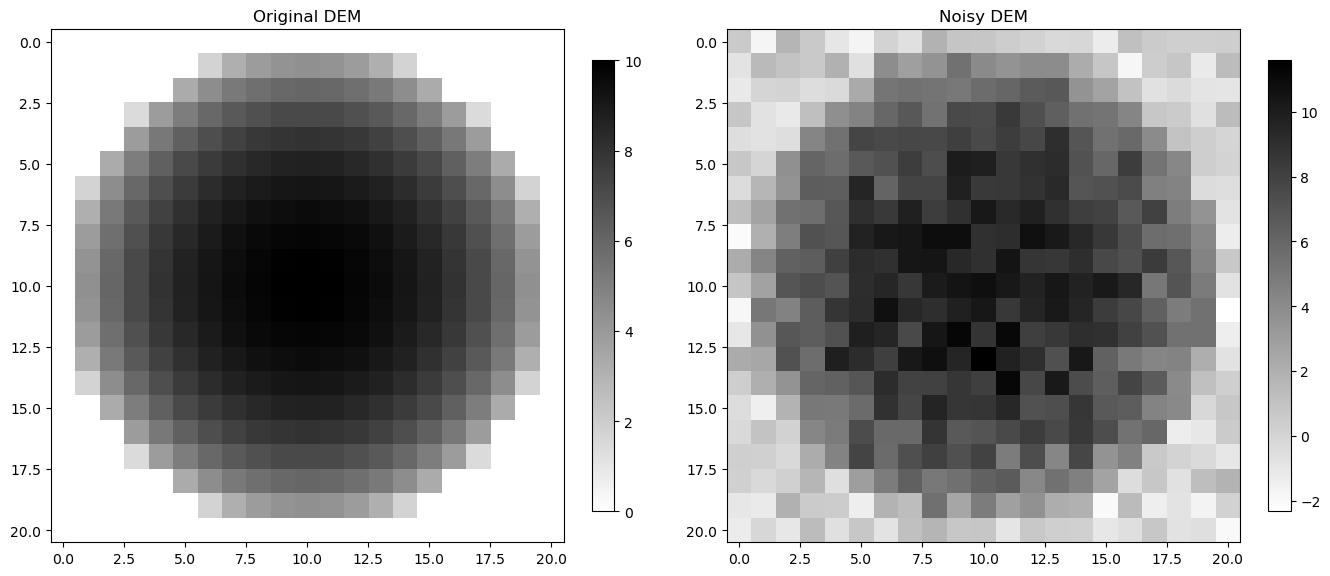

In [22]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(arr1, cmap='binary')
plt.colorbar(fraction=0.04)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM')
plt.imshow(arr_k, cmap='binary')
plt.colorbar(fraction=0.04)
plt.show()

In [23]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[-0.55131628,  1.74747749, -1.70332988, -0.63951565,  0.94461004,
         1.69001918, -0.01996257,  0.63331621, -1.85550245, -0.85509948,
        -0.7824998 , -0.42869412, -0.15014058,  0.22253376,  0.11680141,
         1.26799893, -1.13976138, -0.52646855, -0.32183378, -0.28665504,
        -0.35717907],
       [ 0.77190681, -1.47268319, -0.92578935, -0.60355814, -1.94893255,
         0.62031256, -2.18295818,  0.22175188,  0.35503271, -1.12121577,
         0.31217711,  0.70607342, -0.09232936, -0.79309203, -0.47463465,
        -0.79793683,  1.80465385, -0.4065055 , -0.79423727,  1.17322166,
        -1.31116113],
       [ 1.09536346,  0.02902431, -0.02972826,  0.45597534,  0.29106172,
         0.9931441 , -0.70624473, -0.15019591,  0.38832929,  0.85696977,
         0.30366762, -0.09791146, -0.96005044, -1.60101558,  0.90916591,
         0.60340336, -1.02832273,  0.64917479,  0.34756907,  0.82194239,
         0.87480739],
       [-0.80850097,  0.72021155,  1.1206998 ,  0.25387118

In [27]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_10_noisy.tif', ncols, ncols, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_k)
# gtiff.FlushCache()
gtiff = None

In [29]:
#hemicylinder
R = 10

arr_c = np.zeros((int(4*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

arr_c

array([[ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843,  8.        ,
         8.66025404,  9.16515139,  9.53939201,  9.79795897,  9.94987437,
        10.        ,  9.94987437,  9.79795897,  9.53939201,  9.16515139,
         8.66025404,  8.        ,  7.14142843,  6.        ,  4.35889894,
         0.        ],
       [ 0.        ,  4.35889894,  6.        ,  7.14142843

In [30]:
np.max(arr_c)

10.0

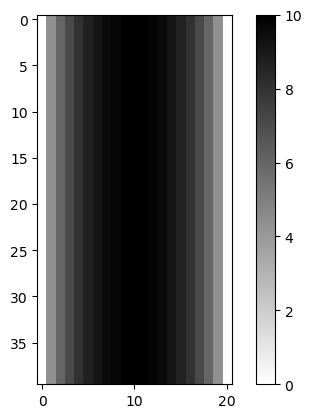

In [31]:
plt.imshow(arr_c, cmap='binary')
plt.colorbar()
plt.show()

In [34]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_cn = arr_c + arr_n
arr_cn

array([[ 1.29861720e-01,  3.43497127e+00,  4.37040971e+00,
         7.98619705e+00,  7.47853554e+00,  7.71682664e+00,
         1.04968187e+01,  8.34006068e+00,  8.88486389e+00,
         1.06774850e+01,  1.06329099e+01,  9.63023109e+00,
         1.01807581e+01,  9.00260579e+00,  9.32883650e+00,
         9.16726382e+00,  7.51624020e+00,  7.85477910e+00,
         4.62891241e+00,  3.39527370e+00,  1.01372728e+00],
       [-8.73760990e-03,  5.37215779e+00,  5.43592743e+00,
         5.62109700e+00,  7.32767636e+00,  9.61184458e+00,
         7.75465129e+00,  9.84068496e+00,  8.61340271e+00,
         1.11024708e+01,  9.76410719e+00,  8.38919014e+00,
         9.85056938e+00,  1.00157834e+01,  8.80702069e+00,
         8.40605672e+00,  8.01257178e+00,  9.15759379e+00,
         7.32786230e+00,  2.13110152e+00,  6.98638523e-01],
       [-1.00350345e+00,  4.38374572e+00,  5.43848963e+00,
         5.84649583e+00,  1.05609591e+01,  8.09799780e+00,
         8.89390119e+00,  8.18713728e+00,  8.74833889e

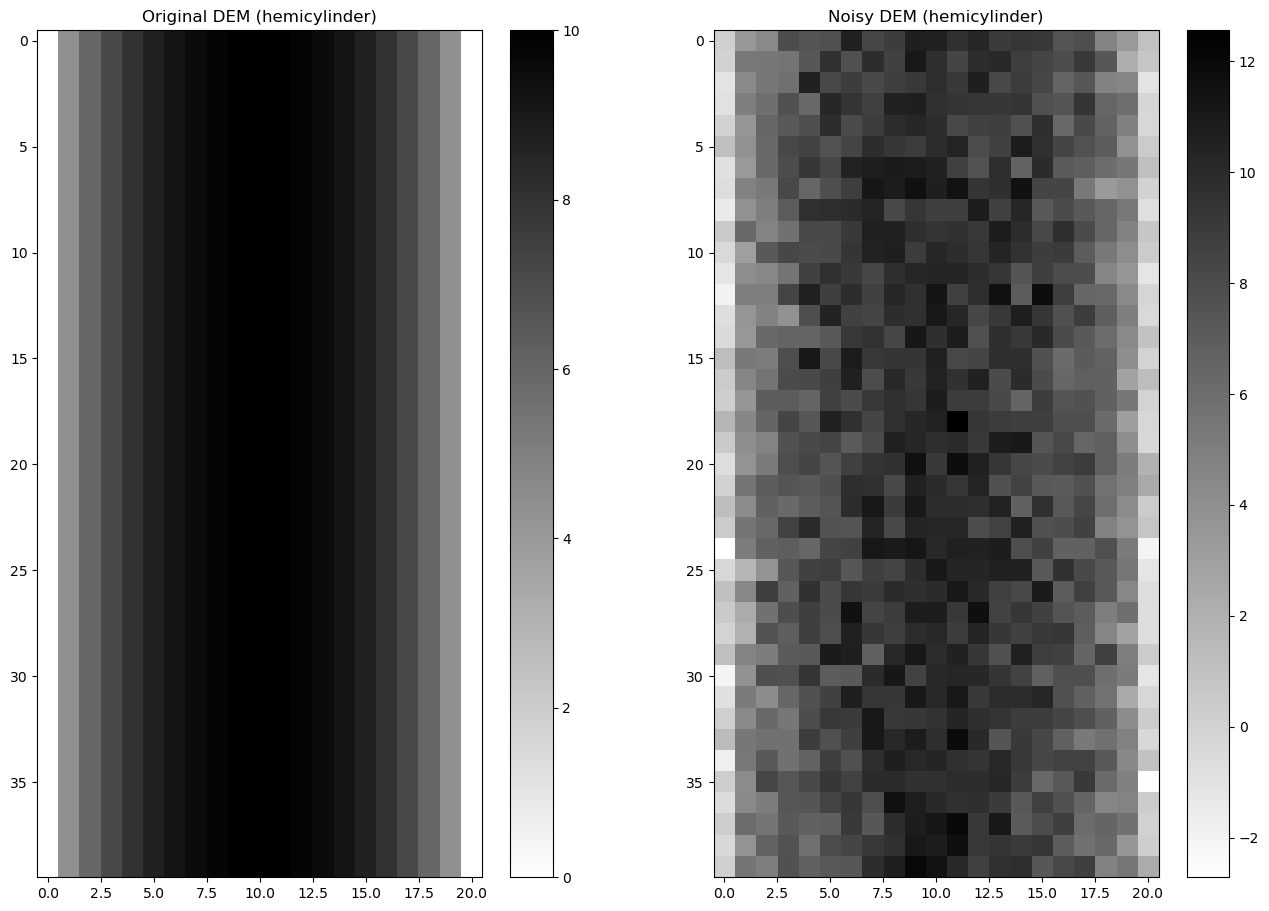

In [35]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hemicylinder)')
plt.imshow(arr_c, cmap='binary')
plt.colorbar()

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hemicylinder)')
plt.imshow(arr_cn, cmap='binary')
plt.colorbar()
plt.show()

In [20]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemicylinder_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_c)
# gtiff.FlushCache()
gtiff = None

In [5]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 200
b1 = 100

arr_hp = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_hp.shape[0]
ncols = arr_hp.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_hp[x][y] = z
        except ValueError:
            pass

arr_hp

array([[ 0.0000000e+00, -1.0000000e-04, -4.0000000e-04, ...,
        -1.5840400e+01, -1.5920100e+01, -1.6000000e+01],
       [ 2.5000000e-05, -7.5000000e-05, -3.7500000e-04, ...,
        -1.5840375e+01, -1.5920075e+01, -1.5999975e+01],
       [ 1.0000000e-04,  0.0000000e+00, -3.0000000e-04, ...,
        -1.5840300e+01, -1.5920000e+01, -1.5999900e+01],
       ...,
       [ 3.9601000e+00,  3.9600000e+00,  3.9597000e+00, ...,
        -1.1880300e+01, -1.1960000e+01, -1.2039900e+01],
       [ 3.9800250e+00,  3.9799250e+00,  3.9796250e+00, ...,
        -1.1860375e+01, -1.1940075e+01, -1.2019975e+01],
       [ 4.0000000e+00,  3.9999000e+00,  3.9996000e+00, ...,
        -1.1840400e+01, -1.1920100e+01, -1.2000000e+01]])

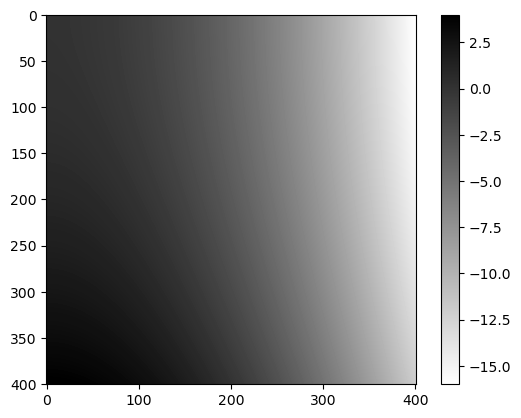

In [6]:
plt.imshow(arr_hp, cmap='binary')
plt.colorbar()
plt.show()

In [7]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/paraboloid_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
gtiff.GetRasterBand(1).WriteArray(arr_hp)

gtiff = None

In [9]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_hpn = arr_hp + arr_n
arr_hpn

array([[  0.23957637,  -1.61834701,   0.49252459, ..., -16.14863044,
        -16.23661026, -16.4942385 ],
       [ -1.40851639,  -0.39611891,  -0.26352285, ..., -15.24717637,
        -15.069596  , -15.81025148],
       [ -1.22676671,  -0.073998  ,  -0.54755999, ..., -17.12985659,
        -18.63663228, -15.13551242],
       ...,
       [  5.03045543,   3.60987537,   3.63019587, ..., -11.63819929,
        -10.67055643, -13.18123245],
       [  3.64124563,   4.88599886,   3.25601858, ..., -10.5504284 ,
        -13.02263601, -11.72077861],
       [  4.01548609,   4.82431989,   3.70944424, ..., -12.26335332,
        -10.21049353, -12.23028192]])

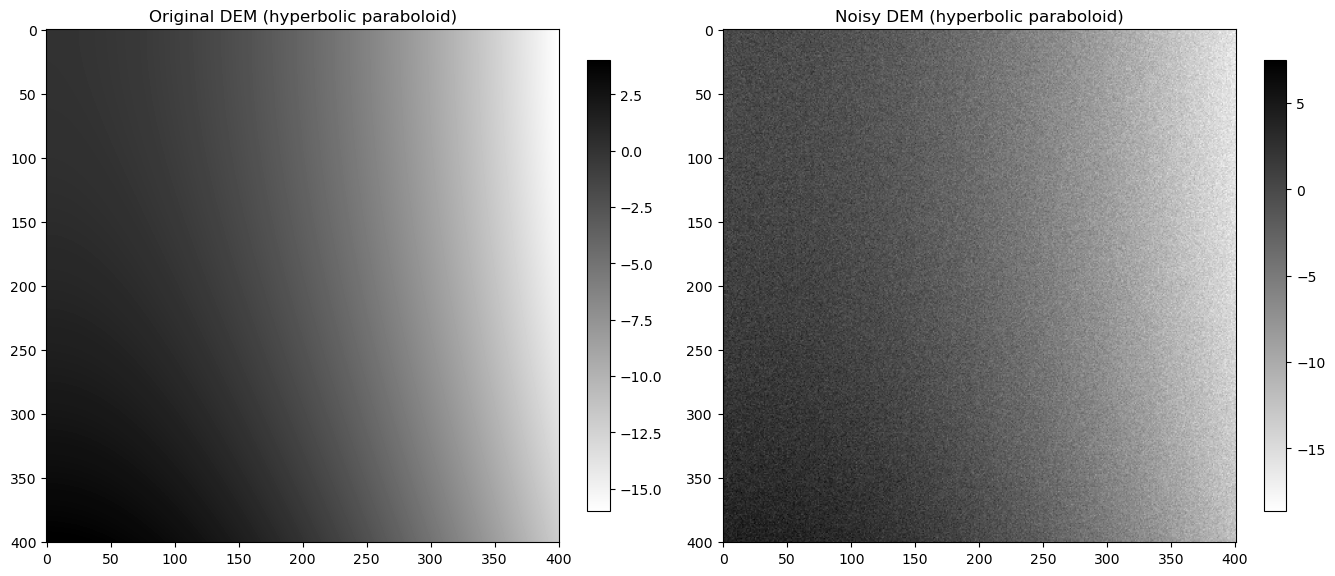

In [11]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.04)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.04)
plt.show()